<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/tensorflow/TFlite_Object_Detection_Custom_Model_Export_With_Metadata_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SSD MobileNet V2 TFlite Export Quantized with Metadata

In [1]:
#!pip install -U --pre tf-nightly
!pip install tf-nightly
#!pip install -U --pre tf-nightly-gpu

     |████████████████████████████████| 391.9MB 43kB/s 
     |████████████████████████████████| 10.6MB 214kB/s 
     |████████████████████████████████| 471kB 44.2MB/s 


In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.0-dev20201005


In [3]:
print(tf.test.is_gpu_available)
print(tf.test.gpu_device_name())

<function is_gpu_available at 0x7f9b3a025b70>



In [4]:
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [5]:
!git clone https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 45499 (delta 25), reused 48 (delta 4), pack-reused 45426
Receiving objects: 100% (45499/45499), 550.91 MiB | 18.41 MiB/s, done.
Resolving deltas: 100% (31130/31130), done.


In [6]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-cp36-none-any.whl size=1579568 sha256=3d7aff8d90f9db3c0ddd2c3c6e7b5f51167483a54805039e50d2c473b3b4b008
  Stored in directory: /tmp/pip-ephem-wheel-cache-0hldg9hl/wheels/94/49/4b/39b051683087a22ef7e80ec52152a27249d1a644ccf4e442ea
  Created wheel for avro-python3: filename=avro_python3-1.10.0-cp36-none-any.whl size=43735 sha256=a069873154fd33a60bd68b05db86318559e74bb55e14537ba9d07e778af13aca
  Stored in directory: /root/.cache/pip/wheels/3f/15/cd/fe4ec8b88c130393464703ee8111e2cddebdc40e1b59ea85e9
  Created wheel for oauth2client: filename=oauth2client-3.0.0-cp36-none-any.whl size=106382 sha256=20e10aa0a76a109163cd453f4e588bda05675177c87fed7b605adae2ab4a2e18
  Stored in directory: /root/.cache/pip/wheels/48/f7/87/b932f09c6335dbcf45d916937105a372ab14f353a9ca431d7d
  Created wheel for future: filename=future-0.18.2-cp36-none-any.whl size=491057 sha256=e126c7fd0558a7f465e8b206b8d527b142345

ERROR: pydrive 1.3.1 has requirement oauth2client>=4.0.0, but you'll have oauth2client 3.0.0 which is incompatible.
ERROR: multiprocess 0.70.10 has requirement dill>=0.3.2, but you'll have dill 0.3.1.1 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.24.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: apache-beam 2.24.0 has requirement avro-python3!=1.9.2,<1.10.0,>=1.8.1; python_version >= "3.0", but you'll have avro-python3 1.10.0 which is incompatible.


In [7]:
!pwd

/content


In [8]:
%cd models/research/

/content/models/research


In [9]:
import os

model_path = "object_detection/downloaded_model"
os.makedirs(model_path)

In [10]:
!pwd

/content/models/research


In [11]:
# Download the checkpoint and put it into models/research/object_detection/test_data/

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
!tar -xf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
!mv ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint "$model_path"

--2020-10-06 13:28:41--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|64.233.189.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_32 100%[===================>]  43.91M  20.0MB/s    in 2.2s    

2020-10-06 13:28:45 (20.0 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’ saved [46042990/46042990]



In [12]:
!pwd

/content/models/research


In [13]:
exported_model_dir = "custom_exported_model"
os.makedirs(exported_model_dir)

In [ ]:
!rm -r "$exported_model_dir"

In [14]:
# From the tensorflow/models/research/ directory
!python object_detection/export_tflite_graph_tf2.py \
    --pipeline_config_path ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config \
    --trained_checkpoint_dir object_detection/downloaded_model/checkpoint \
    --output_directory "$exported_model_dir"

2020-10-06 13:28:54.773882: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-10-06 13:28:54.773936: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2020-10-06 13:28:57.726691: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2020-10-06 13:28:57.727844: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-06 13:28:57.731224: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-06 13:28:57.732020: I tensorflow/core/common_runtime/gpu/gpu_device.cc:

In [ ]:
# From the tensorflow/models/research/ directory
!python object_detection/export_tflite_graph_tf2.py \
    --pipeline_config_path /content/models/research/object_detection/configs/tf2/ssd_mobilenet_v2_320x320_coco17_tpu-8.config \
    --trained_checkpoint_dir object_detection/downloaded_model/checkpoint \
    --output_directory "$exported_model_dir"

In [15]:
!pwd

/content/models/research


In [16]:
saved_model_dir = exported_model_dir + "/saved_model"
#saved_model_dir = "ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model"

In [17]:
!cp /content/models/research/object_detection/data/mscoco_label_map.pbtxt "$saved_model_dir"

In [18]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory

#converter.optimizations = [tf.lite.Optimize.DEFAULT]
#converter.target_spec.supported_types = [tf.float16]

tflite_model = converter.convert()

# Save the model.
with open(exported_model_dir + '/model.tflite', 'wb') as f:
  f.write(tflite_model)

In [19]:
!pwd

/content/models/research


In [20]:
!wget https://www.carkeys.co.uk/media/1753/2017_cars_coming_fast_cars_0.jpg -O "car1.jpg"

--2020-10-06 13:30:03--  https://www.carkeys.co.uk/media/1753/2017_cars_coming_fast_cars_0.jpg
Resolving www.carkeys.co.uk (www.carkeys.co.uk)... 40.113.90.202
Connecting to www.carkeys.co.uk (www.carkeys.co.uk)|40.113.90.202|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57763 (56K) [image/jpeg]
Saving to: ‘car1.jpg’

car1.jpg            100%[===================>]  56.41K   121KB/s    in 0.5s    

2020-10-06 13:30:05 (121 KB/s) - ‘car1.jpg’ saved [57763/57763]



In [21]:
!wget https://luxurylaunches.com/wp-content/uploads/2019/11/7-favourite-exotic-cars.jpg -O "car2.jpg"

--2020-10-06 13:30:05--  https://luxurylaunches.com/wp-content/uploads/2019/11/7-favourite-exotic-cars.jpg
Resolving luxurylaunches.com (luxurylaunches.com)... 104.26.15.152, 104.26.14.152, 172.67.73.21
Connecting to luxurylaunches.com (luxurylaunches.com)|104.26.15.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244409 (239K) [image/jpeg]
Saving to: ‘car2.jpg’

car2.jpg            100%[===================>] 238.68K  --.-KB/s    in 0.1s    

2020-10-06 13:30:05 (2.02 MB/s) - ‘car2.jpg’ saved [244409/244409]



In [22]:
!wget https://i.pinimg.com/originals/ab/18/74/ab18747478674545e0973c2d57b32260.jpg -O "bus1.jpg"

--2020-10-06 13:30:05--  https://i.pinimg.com/originals/ab/18/74/ab18747478674545e0973c2d57b32260.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.193.24.222, 2600:1417:76:4a3::1931, 2600:1417:76:4a2::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.193.24.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434785 (425K) [image/jpeg]
Saving to: ‘bus1.jpg’

bus1.jpg            100%[===================>] 424.59K  --.-KB/s    in 0.01s   

2020-10-06 13:30:05 (32.1 MB/s) - ‘bus1.jpg’ saved [434785/434785]



In [23]:
!wget "http://www.ilovedurban.co.za/wp-content/uploads/2014/10/Busses.jpg" 

--2020-10-06 13:30:06--  http://www.ilovedurban.co.za/wp-content/uploads/2014/10/Busses.jpg
Resolving www.ilovedurban.co.za (www.ilovedurban.co.za)... 129.232.138.164
Connecting to www.ilovedurban.co.za (www.ilovedurban.co.za)|129.232.138.164|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118871 (116K) [image/jpeg]
Saving to: ‘Busses.jpg’

Busses.jpg          100%[===================>] 116.08K  93.9KB/s    in 1.2s    

2020-10-06 13:30:08 (93.9 KB/s) - ‘Busses.jpg’ saved [118871/118871]



In [24]:
!wget "https://www.australiangeographic.com.au/wp-content/uploads/2018/06/feeding-birds.jpg" -O "birds1.jpg"

--2020-10-06 13:30:08--  https://www.australiangeographic.com.au/wp-content/uploads/2018/06/feeding-birds.jpg
Resolving www.australiangeographic.com.au (www.australiangeographic.com.au)... 34.80.45.47
Connecting to www.australiangeographic.com.au (www.australiangeographic.com.au)|34.80.45.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 219142 (214K) [image/jpeg]
Saving to: ‘birds1.jpg’

birds1.jpg          100%[===================>] 214.01K  --.-KB/s    in 0.002s  

2020-10-06 13:30:09 (86.7 MB/s) - ‘birds1.jpg’ saved [219142/219142]



(443, 754, 3)


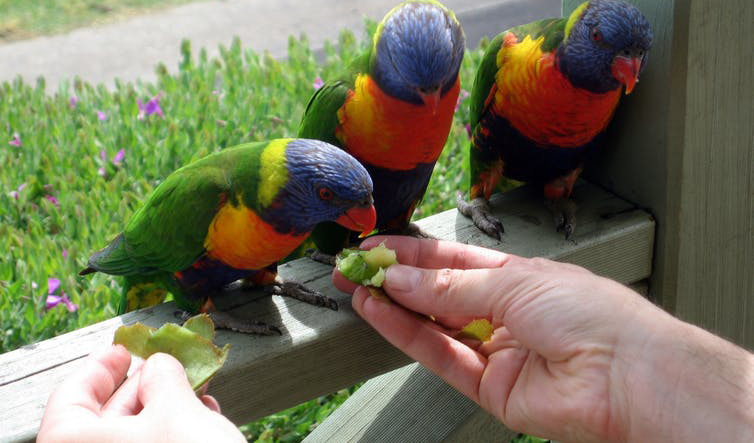

In [83]:
import cv2
from google.colab.patches import cv2_imshow


#im1 = cv2.imread('car1.jpg')
#im1 = cv2.imread('car2.jpg')
im1 = cv2.imread('birds1.jpg')
#im1 = cv2.imread('bus1.jpg')
#im1 = cv2.imread('Busses.jpg')
print(im1.shape)

cv2_imshow(im1)

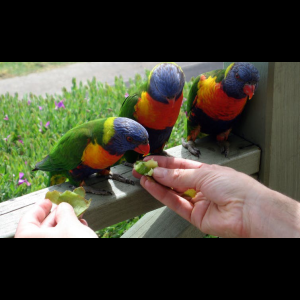

In [84]:
import cv2
import numpy as np

def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

v_img = im1.copy() # vertical image
scaled_v_img = resizeAndPad(v_img, (300,300), 0)
cv2_imshow(scaled_v_img)

im1 = scaled_v_img

[{'name': 'serving_default_input:0', 'index': 0, 'shape': array([  1, 300, 300,   3], dtype=int32), 'shape_signature': array([  1, 300, 300,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:3', 'index': 247, 'shape': array([ 1, 10,  4], dtype=int32), 'shape_signature': array([ 1, 10,  4], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'StatefulPartitionedCall:2', 'index': 248, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=

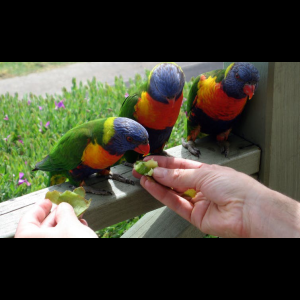

(1, 300, 300, 3)
[[[0.5232447  0.42642763 0.7982183  0.99777055]
  [0.20542356 0.5968744  0.53853357 0.8724497 ]
  [0.2126522  0.41435418 0.5096774  0.62538123]
  [0.3192317  0.08778626 0.66948515 0.54708916]
  [0.6171841  0.06623951 0.784324   0.31770554]
  [0.28087747 0.40377736 0.7223128  0.9486443 ]
  [0.4342487  0.4077667  0.7648462  0.9295261 ]
  [0.26672179 0.05891857 0.73513836 0.71363723]
  [0.20946114 0.3681427  0.6183103  0.60690916]
  [0.22665538 0.10957472 0.61431146 0.6050679 ]]]
[[ 0. 15.  0. 87.  0.  0.  0. 15. 15. 87.]]
[[0.7695629  0.7105289  0.5177681  0.5071287  0.47049493 0.44685438
  0.3967489  0.39338025 0.35128036 0.33884373]]
[10.]


In [85]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
#interpreter = tf.lite.Interpreter(model_path=exported_model_dir + "/detect.tflite")
interpreter = tf.lite.Interpreter(model_path=exported_model_dir + "/model.tflite")

interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

# Test the model on random input data.
input_shape = input_details[0]['shape']

print(input_shape)


im2 = im1.copy()

cv2_imshow(im2)

im2_arr = np.asarray(im2)

im2_arr = (2.0 / 255.0) * im2_arr - 1.0


im3_arr = np.expand_dims(im2_arr, axis=0)
print(im3_arr.shape)


## Select based on quantized or unquantized model
input_data = np.array(im3_arr, dtype=np.float32)
#input_data = np.array(im3_arr, dtype=np.uint8)


#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)


interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

output_data = interpreter.get_tensor(output_details[1]['index'])
print(output_data)

output_data = interpreter.get_tensor(output_details[2]['index'])
print(output_data)

output_data = interpreter.get_tensor(output_details[3]['index'])
print(output_data)

In [32]:
def box_normal_to_pixel(box, dim,scalefactor=1):
    height, width = dim[0], dim[1]
    ymin = int(box[0]*height*scalefactor)
    xmin = int(box[1]*width*scalefactor)

    ymax = int(box[2]*height*scalefactor)
    xmax= int(box[3]*width*scalefactor)
    return np.array([xmin,ymin,xmax,ymax])  

In [35]:
## SSD bounding box value test
print(box_normal_to_pixel(output_data_squeeze[1], (300, 300)))

# https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/ops/image_ops_impl.py#L4893-L4945
print(box_normal_to_pixel([0.1, 0.2, 0.5, 0.9], (100, 200)))

[ 40  10 180  50]


[[[0.5232447  0.42642763 0.7982183  0.99777055]
  [0.20542356 0.5968744  0.53853357 0.8724497 ]
  [0.2126522  0.41435418 0.5096774  0.62538123]
  [0.3192317  0.08778626 0.66948515 0.54708916]
  [0.6171841  0.06623951 0.784324   0.31770554]
  [0.28087747 0.40377736 0.7223128  0.9486443 ]
  [0.4342487  0.4077667  0.7648462  0.9295261 ]
  [0.26672179 0.05891857 0.73513836 0.71363723]
  [0.20946114 0.3681427  0.6183103  0.60690916]
  [0.22665538 0.10957472 0.61431146 0.6050679 ]]]
[[0.5232447  0.42642763 0.7982183  0.99777055]
 [0.20542356 0.5968744  0.53853357 0.8724497 ]
 [0.2126522  0.41435418 0.5096774  0.62538123]
 [0.3192317  0.08778626 0.66948515 0.54708916]
 [0.6171841  0.06623951 0.784324   0.31770554]
 [0.28087747 0.40377736 0.7223128  0.9486443 ]
 [0.4342487  0.4077667  0.7648462  0.9295261 ]
 [0.26672179 0.05891857 0.73513836 0.71363723]
 [0.20946114 0.3681427  0.6183103  0.60690916]
 [0.22665538 0.10957472 0.61431146 0.6050679 ]]
[0.5232447  0.42642763 0.7982183  0.99777055]


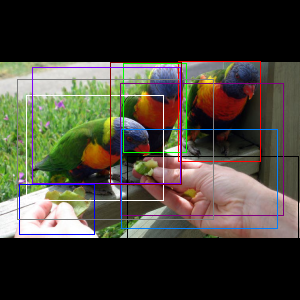

In [104]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

output_data_squeeze = np.squeeze(output_data)
print(output_data_squeeze)

print(output_data_squeeze[0])


color_arr = np.array([
     [0.0, 0.0, 0.0], 
     [0.0, 0.0, 255.0],
     [0.0, 255.0, 0.0], 
     [255.0, 255.0, 255.0],
     [255.0, 0.0, 0.0], 
     [127.0, 0.0, 127.0],
     [255.0, 127.0, 0.0], 
     [127.0, 127.0, 127.0],
     [0.0, 0.0, 127.0], 
     [255.0, 0.0, 127.0]
     ])

new_im = tf.image.draw_bounding_boxes(np.expand_dims(im1.copy(), axis=0), output_data, colors = color_arr)


import cv2
from google.colab.patches import cv2_imshow

input_data_img = np.squeeze(new_im)

cv2_imshow(input_data_img)

[[[0.5232447  0.42642763 0.7982183  0.99777055]
  [0.20542356 0.5968744  0.53853357 0.8724497 ]
  [0.2126522  0.41435418 0.5096774  0.62538123]
  [0.3192317  0.08778626 0.66948515 0.54708916]
  [0.6171841  0.06623951 0.784324   0.31770554]
  [0.28087747 0.40377736 0.7223128  0.9486443 ]
  [0.4342487  0.4077667  0.7648462  0.9295261 ]
  [0.26672179 0.05891857 0.73513836 0.71363723]
  [0.20946114 0.3681427  0.6183103  0.60690916]
  [0.22665538 0.10957472 0.61431146 0.6050679 ]]]
[ 0. 15.  0. 87.  0.  0.  0. 15. 15. 87.]
0.7695629
WORKS
[127 156 299 239]
127 156 299 239
0.0


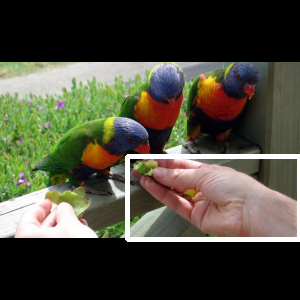

0.7105289
WORKS
[179  61 261 161]
179 61 261 161
15.0


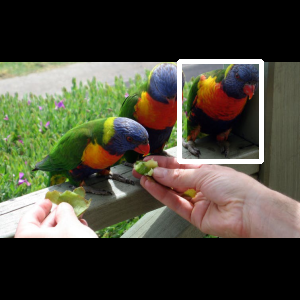

0.5177681
WORKS
[124  63 187 152]
124 63 187 152
0.0


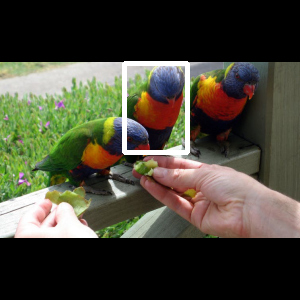

0.5071287
WORKS
[ 26  95 164 200]
26 95 164 200
87.0


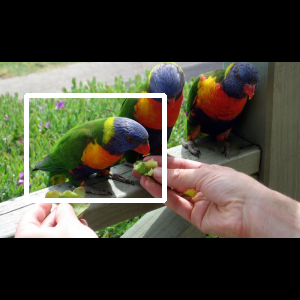

0.47049493
WORKS
[ 19 185  95 235]
19 185 95 235
0.0


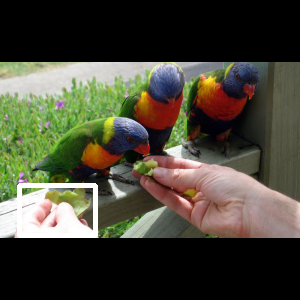

0.44685438
WORKS
[121  84 284 216]
121 84 284 216
0.0


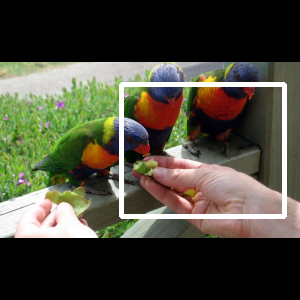

0.3967489
WORKS
[122 130 278 229]
122 130 278 229
0.0


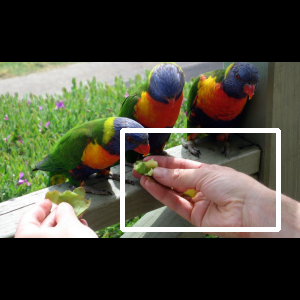

0.39338025
WORKS
[ 17  80 214 220]
17 80 214 220
15.0


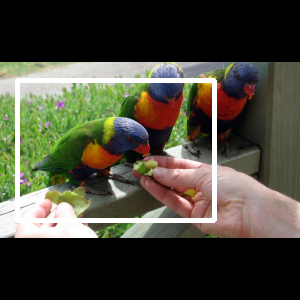

0.35128036
WORKS
[110  62 182 185]
110 62 182 185
15.0


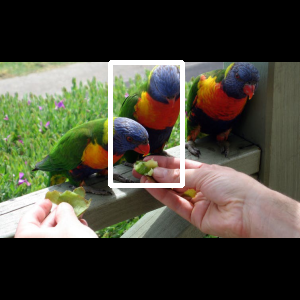

0.33884373
WORKS
[ 32  67 181 184]
32 67 181 184
87.0


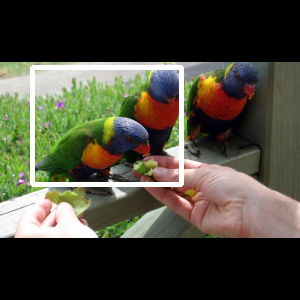

In [38]:
inp_copy = im1.copy()




output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


output_data_squeeze = np.squeeze(output_data)


output_class_squeeze = np.squeeze(interpreter.get_tensor(output_details[1]['index']))
print(output_class_squeeze)


for i in range(0, 10):


  output_data_r = interpreter.get_tensor(output_details[2]['index'])
  output_data_s = np.squeeze(output_data_r)

  print(output_data_s[i])

  if(output_data_s[i] > 0.22):
    print("WORKS")

    box1 = box_normal_to_pixel(output_data_squeeze[i], (300, 300))
    print(box1)





    #inp_copy = cv2.rectangle(inp_copy, (box1[0], box1[1]), (box1[2], box1[3]), (255,255,255), 3)
    inp_copy = cv2.rectangle(im1.copy(), (box1[0], box1[1]), (box1[2], box1[3]), (255,255,255), 3)
    

    print(box1[0], box1[1], box1[2], box1[3])
    print(output_class_squeeze[i])

    inp_copy_img = np.squeeze(inp_copy)

    cv2_imshow(inp_copy_img)


In [ ]:
!pwd

/content/models/research


In [42]:
import tensorflow as tf

#SAVED_MODEL_PATH = os.path.join(os.getcwd(),'object_detection', 'fine_tuned_model', 'saved_model', 'saved_model.pb')
# SAVED_MODEL_PATH: '/content/gdrive/My Drive/models/research/object_detection/exported_model/saved_model/saved_model.pb'
SAVED_MODEL_PATH = "/content/models/research/custom_exported_model/saved_model/"

converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_PATH)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

open(exported_model_dir + "/detect.tflite", "wb").write(tflite_model)

6618592

# Pack Metadata

In [43]:
!pip install tflite-support

     |████████████████████████████████| 1.0MB 2.5MB/s 
     |████████████████████████████████| 296kB 7.6MB/s 


In [57]:
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb

""" ... """
"""Creates the metadata for an image classifier."""

# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "MobileNetV2 SSD 300x300 Object Detector"
model_meta.description = ("Localize the most prominent object in the "
                          "image from a set of N categories such as "
                          "trees, animals, food, vehicles, person etc.")
model_meta.version = "v1"
model_meta.author = "AA"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")

In [58]:
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()

# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()

In [59]:
input_meta.name = "image"
input_meta.description = (
    "Input image to be classified. The expected image is {0} x {1}, with "
    "three channels (red, blue, and green) per pixel. Each value in the "
    "tensor is a single byte between 0 and 255.".format(300, 300))
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

In [60]:
labelmap_file = "/content/models/research/custom_exported_model/labelmap.txt"

#export_model_path = "/content/models/research/custom_exported_model/detect.tflite"

export_model_path = "/content/models/research/custom_exported_model/model.tflite"

In [61]:
# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()
output_meta.name = "probability"
output_meta.description = "Probabilities of the 1001 labels respectively."
output_meta.content = _metadata_fb.ContentT()
output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_stats = _metadata_fb.StatsT()
output_stats.max = [1.0]
output_stats.min = [0.0]
output_meta.stats = output_stats
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename(labelmap_file)
label_file.description = "Labels for objects that the model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]

In [62]:
# Creates subgraph info.
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [output_meta, output_meta, output_meta, output_meta]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

In [63]:

populator = _metadata.MetadataPopulator.with_model_file(export_model_path)
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files([labelmap_file])
populator.populate()

In [65]:

displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)
export_json_file = os.path.join("/content/export/", #"detect.json")
                    os.path.splitext(os.path.basename(export_model_path))[0] + ".json")
json_file = displayer.get_metadata_json()
# Optional: write out the metadata as a json file
with open(export_json_file, "w") as f:
  f.write(json_file)